#     Model Building and saving the model using Pickle


1.Import required libraries and read the dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [2]:
df=pd.read_csv('loan_approval_data.csv')
df.head()


,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


2.Check the first few samples, shape, info of the data and try to familiarize yourself with different features


In [3]:
df.shape


(614, 13)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [5]:
df.columns


Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

3.Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features


In [6]:
df.isnull().sum()


loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [7]:
df["loanamount"].fillna((df["loanamount"].median()), inplace=True)
df["loan_amount_term"].fillna((df["loan_amount_term"].median()), inplace=True)
df["credit_history"].fillna((df["credit_history"].median()), inplace=True)
df["married"].fillna((df["married"].mode()[0]), inplace=True)
df["gender"].fillna((df["gender"].mode()[0]), inplace=True)
df["self_employed"].fillna((df["self_employed"].mode()[0]), inplace=True)
df["dependents"].fillna((df["dependents"].mode()[0]), inplace=True)
df.isnull().sum()


loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [8]:
df = df.drop(["loan_id", "dependents"], axis=1)


In [9]:
df.head()


,gender,married,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,graduate,no,5849,0.0,128.0,360.0,1.0,urban,y
1,male,yes,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,male,yes,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,male,no,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


4.Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations


In [10]:
categorical_features = df.select_dtypes(include = [np.object_])
categorical_features.columns


Index(['gender', 'married', 'education', 'self_employed', 'property_area',
       'loan_status'],
      dtype='object')

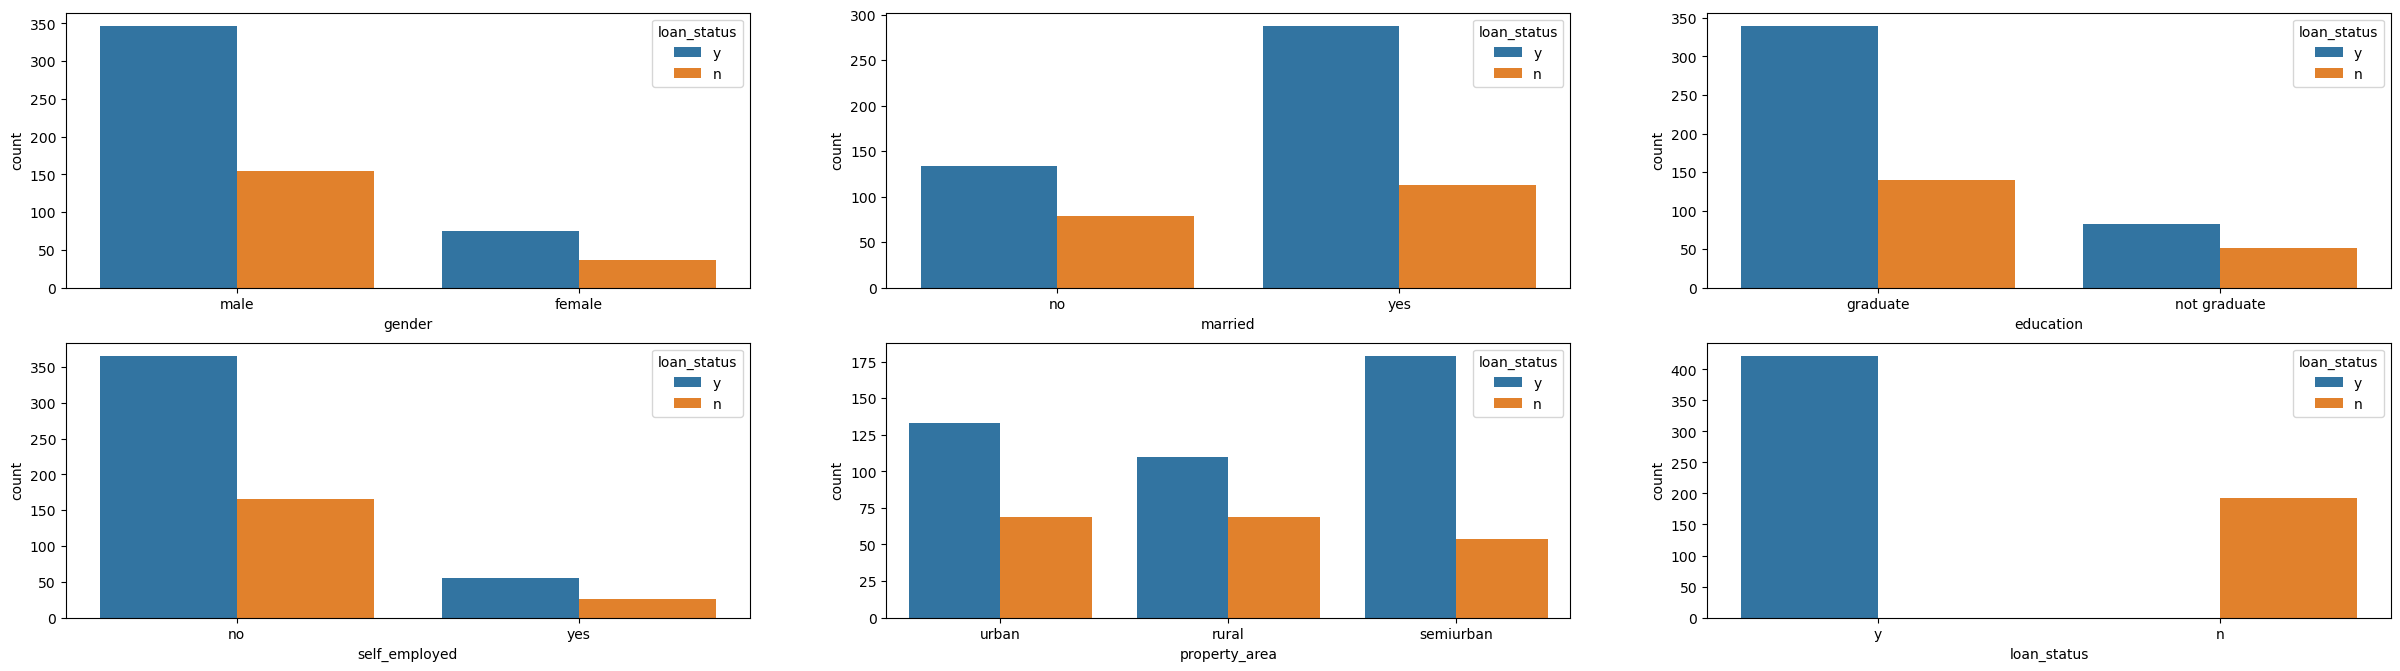

In [11]:
i = 1
plt.figure(figsize = (30, 25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature, hue = 'loan_status', data = df)
    i += 1


C:\Users\Shweta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


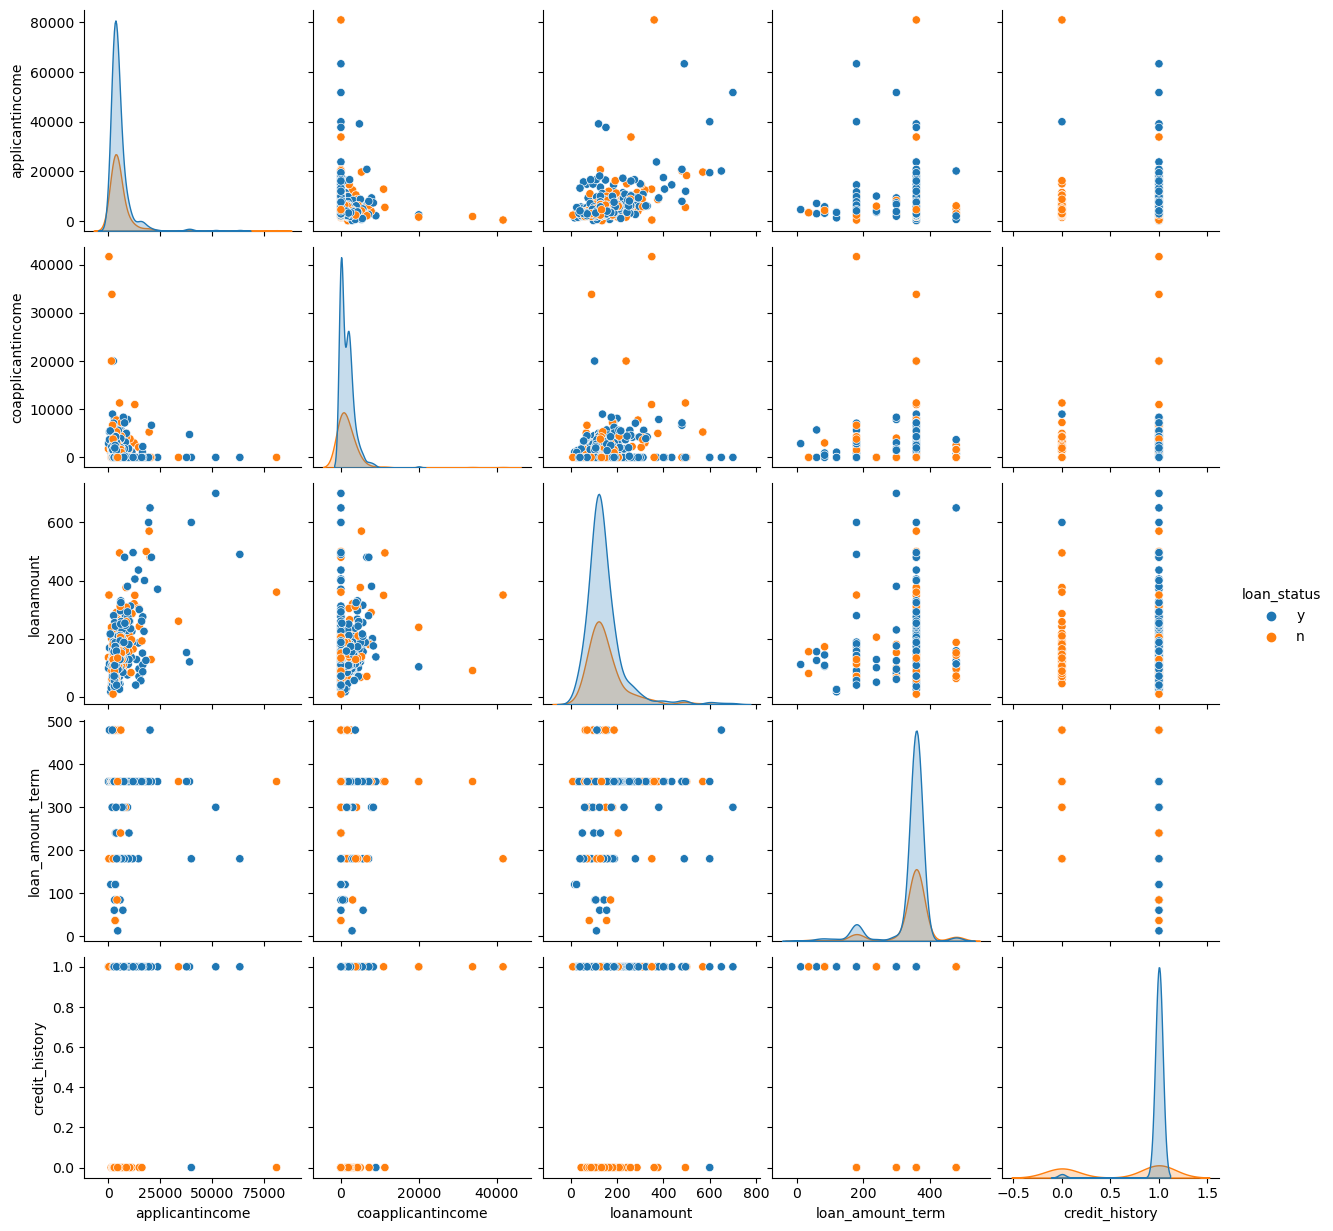

In [12]:
sns.pairplot(df, hue="loan_status")


5.Encode the categorical data


In [13]:
#converting categorical data into vectors that machine can deal with
cleanup_num = {"loan_status":   {"y": 1, "n": 0},
              "gender":  {"male": 1, "female": 0},
              "married": {"yes": 1, "no": 0}, "self_employed": {"yes": 1, "no": 0},
              "education": {"graduate": 0, "not graduate": 1}, "property_area": {'urban':2,'semiurban':1,'rural':0}}
     


In [14]:
df.replace(cleanup_num, inplace=True)
df.head()


,gender,married,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


6.Separate the target and independent features and split the data into train and test.


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
     


In [16]:
x = df.drop('loan_status', axis=1)
y = df['loan_status']


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)


(429, 10) (185, 10)
(429,) (185,)


7.Build any classification model to predict the loan status of the customer and save your model using pickle


In [18]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=1)


In [19]:
model=LogisticRegression()
scoring = "accuracy"


In [20]:
score = cross_val_score(model, x_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring)
print(score)


[0.76744186 0.81395349 0.81395349 0.79069767 0.81395349 0.62790698
 0.76744186 0.79069767 0.81395349 0.76190476]


C:\Users\Shweta\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
round(np.mean(score)*100, 2)


77.62

In [22]:
clf = DecisionTreeClassifier()


In [23]:
scoring = 'accuracy'
score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[0.72093023 0.72093023 0.76744186 0.72093023 0.76744186 0.6744186
 0.72093023 0.6744186  0.72093023 0.5952381 ]


In [24]:
round(np.mean(score)*100, 2)


70.84

In [25]:
from sklearn.ensemble import RandomForestClassifier
R_clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(R_clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[0.72093023 0.86046512 0.79069767 0.74418605 0.8372093  0.81395349
 0.76744186 0.81395349 0.74418605 0.69047619]


In [26]:
round(np.mean(score)*100, 2)


77.83

In [27]:
model.fit(x_train, y_train)

prediction = model.predict(x_test)


In [28]:
pickle.dump(model, open('model.pkl','wb'))
